### Image Pipeline

<ol>
<li> Take a picture of your face or have a friend do it.</li>
<li> Import the image into Jupyter Notebook. </li>
<li> Analyze the image </li>
<li> Create a histogram of the whole image. RGB </li>
<li> Modify your image with brightness and contrast. </li>
<li> Mask out your face. </li>
<li> Use the mask to create a HSV histogram. </li>
<li> Analyze the histogram for skin tone ranges. </li>
<li> Use the HSV ranges to create a mask. </li>
<li> Apply the mask to the image and segment out your skin/face </li>
<ol>


Skin tracking algorithm.
Using NumPy, OpenCv, and Matplotlib complete the following image pipeline.  Submit python notebook.
Image Pipeline
Take a picture of your face or have a friend do it. 
Import the image into Jupyter Notebook. 
Analyze the image.  
Create a histogram of the whole image.
Modify your image with brightness and contrast so it fills the complete tonal range.
Create a mask of your face. 
Use the mask to create a HSV histogram. 
Analyze the histogram for skin tone ranges.
Use the HSV ranges to create a mask of skin tones. 
 Apply the mask to the image and segment out your skin/face.
For the last two steps in the pipeline, you will need to use cv2.bitwise_and and cv2.inRange. Read the documentation to understand the inputs that both functions accept and what they accomplish.

In [34]:
#Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Importing image

In [35]:
img = cv2.imread('/Users/sasirekha/Desktop/deeps.webp')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

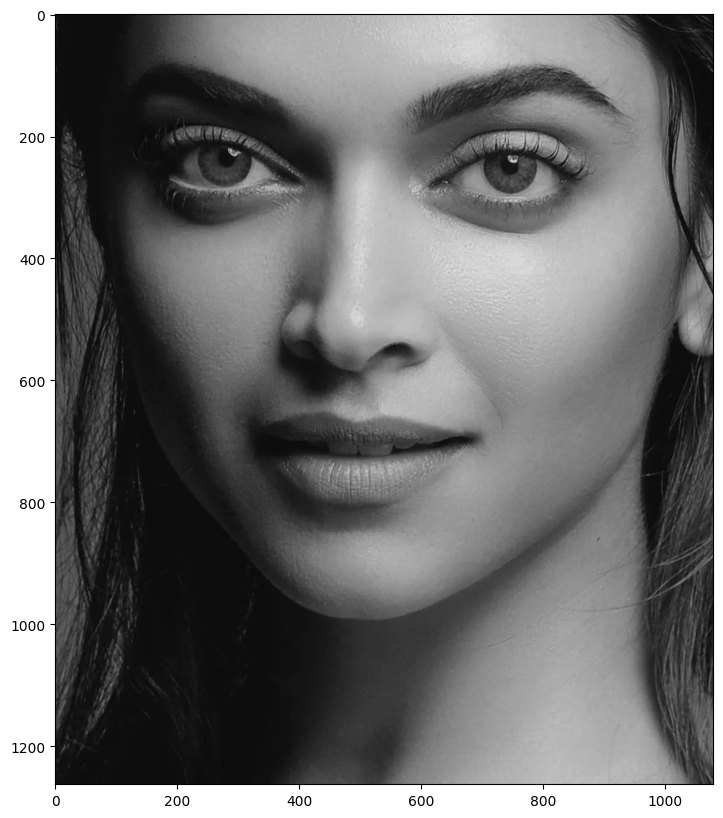

In [53]:
imgContrast = cv2.imread('/Users/sasirekha/Desktop/deeps.webp', 0)
imgContrast = cv2.cvtColor(imgContrast, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize = (10,10))
plt.imshow(imgContrast, cmap='gray')

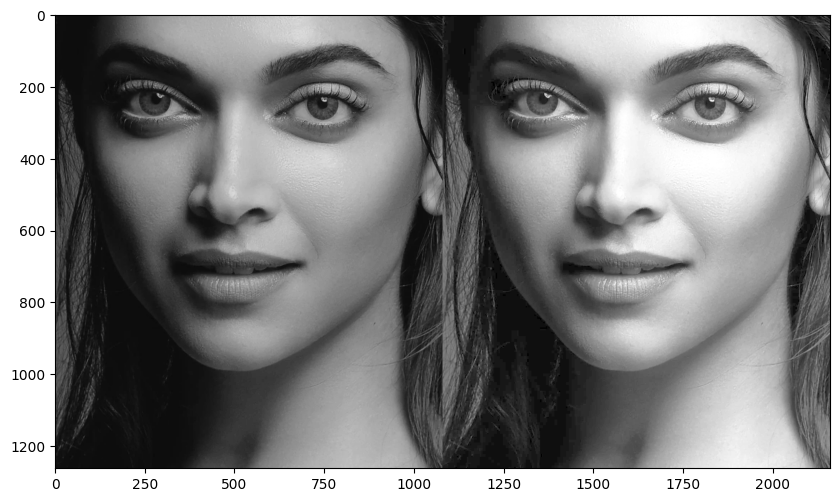

In [47]:
imgContrast = cv2.imread('/Users/sasirekha/Desktop/deeps.webp', 0)
equ = cv2.equalizeHist(imgContrast)
imgTwo = np.concatenate((imgContrast, equ), axis=1)
fig = plt.figure(figsize = (10,10))
plt.imshow(imgTwo, cmap='gray')


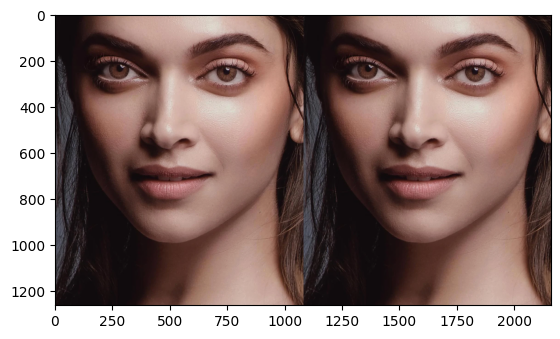

In [50]:
path = '/Users/sasirekha/Desktop/deeps.webp'
img = cv2.imread(path, 1)
cv2_img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(np.concatenate([cv2_img_rgb,img2], axis =1))

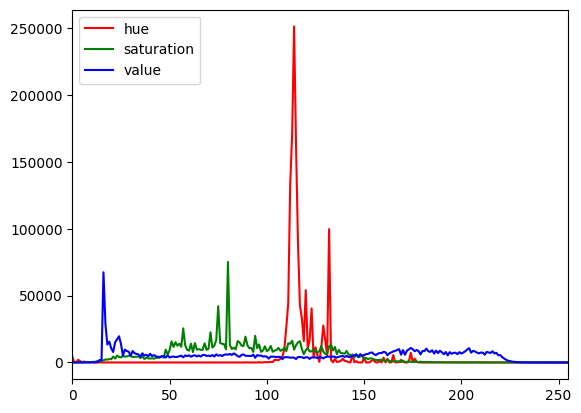

In [36]:
# Convert to HSV
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Create a histogram of HSV values.

# Hue
hist = cv2.calcHist([img],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()


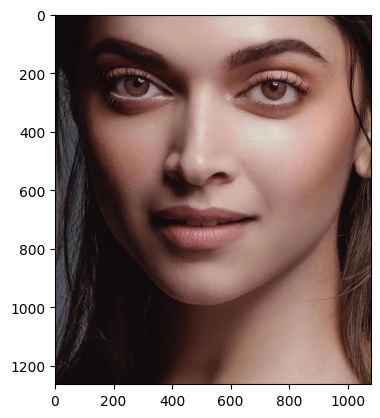

In [37]:
# Import the face image.
img = cv2.imread('/Users/sasirekha/Desktop/deeps.webp')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the image.
plt.imshow(img)

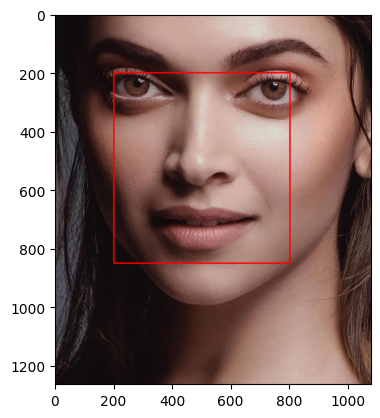

In [38]:

top_left = (200,850)
bottom_right = (800,200)
rect_color = (255,0,0)
thickness = 3
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)
plt.imshow(img_rect)

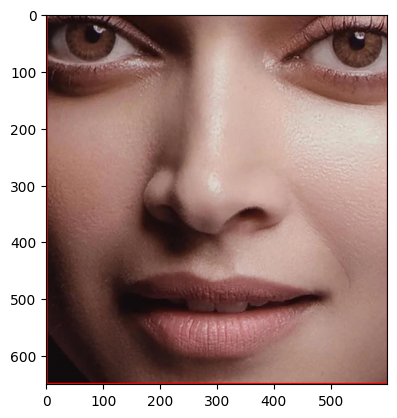

In [39]:
img_masked = img[200:850, 200:800]
plt.imshow(img_masked)

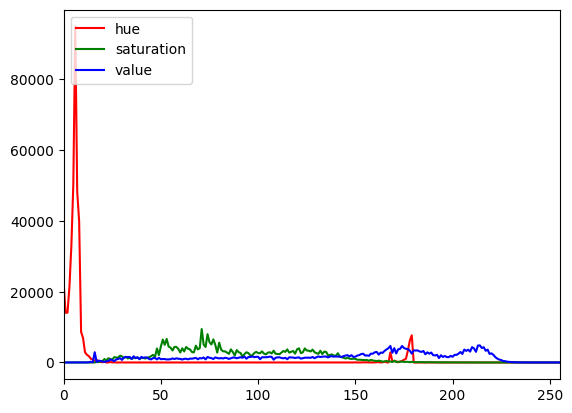

In [40]:
# Create a histogram of HSV values.
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)


# Hue
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

(1263, 1080)


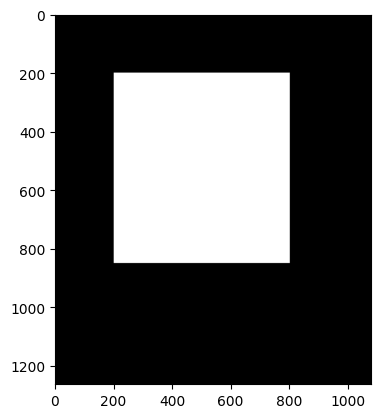

In [41]:

mask = np.zeros(img.shape[:2], np.uint8) 
mask[200:850, 200:800] = 255
print(mask.shape)
plt.imshow(mask, cmap="gray")

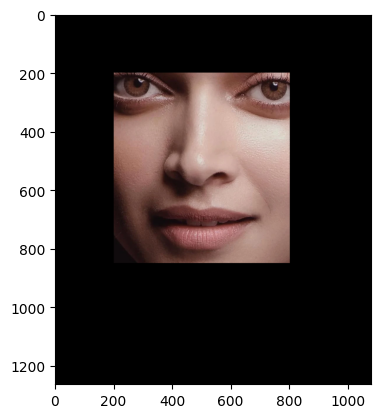

In [42]:
img = cv2.imread('/Users/sasirekha/Desktop/deeps.webp',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(img_masked)

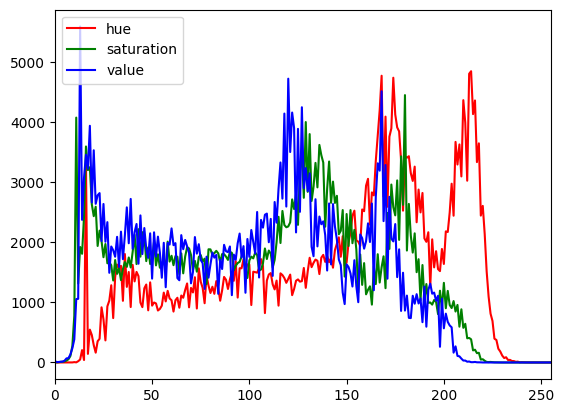

In [43]:
# Hue
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

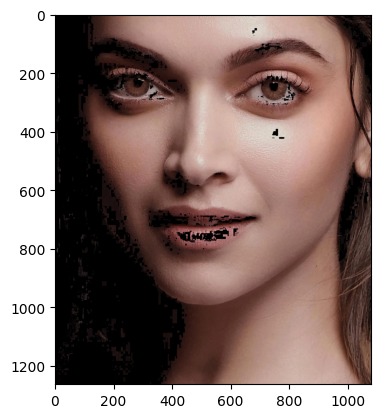

In [44]:
img = cv2.imread('/Users/sasirekha/Desktop/deeps.webp')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Min HSV values 
min_HSV = np.array([0, 0, 0], np.uint8)
# Max HSV values
max_HSV = np.array([20, 225, 255], np.uint8)
skin_Area = cv2.inRange(img, min_HSV, max_HSV)
skin_HSV = cv2.bitwise_and(img, img, mask=skin_Area)
skin_HSV = cv2.cvtColor(skin_HSV, cv2.COLOR_HSV2RGB)
plt.imshow(skin_HSV)

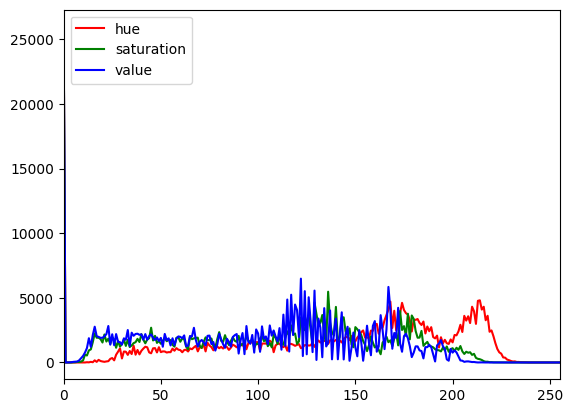

In [54]:
# Hue
hist = cv2.calcHist([skin_HSV],[0],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([skin_HSV],[1],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([skin_HSV],[2],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()